#Geospatial Object Detection using Aerial Imagery

In [1]:
pip install patchify

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Installing necessary libraries

In [3]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Pillow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

In [8]:
minmaxscaler = MinMaxScaler()

In [9]:
dataset_root_folder = "Dataset"

In [10]:
dataset_name = "Semantic segmentation dataset"

In [11]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder)):
  dir_name = path.split(os.path.sep)[-1]
  if dir_name == 'masks':
    images = os.listdir(path)
    print(path)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')):

        a = True

Dataset/Tile 7/masks
Dataset/Tile 2/masks
Dataset/Tile 5/masks
Dataset/Tile 6/masks
Dataset/Tile 1/masks
Dataset/Tile 4/masks
Dataset/Tile 3/masks
Dataset/Tile 8/masks


In [12]:
image_patch_size = 256

In [13]:
image = cv2.imread(f'{dataset_root_folder}/Tile 2/images/image_part_001.jpg',1)

In [14]:
print(image)

[[[ 57  72  81]
  [ 50  65  74]
  [ 72  84  94]
  ...
  [ 77  85 115]
  [ 77  86 124]
  [ 76  87 131]]

 [[ 53  67  79]
  [ 60  75  84]
  [ 82  94 106]
  ...
  [ 83  88 119]
  [ 76  85 123]
  [ 69  80 124]]

 [[ 67  78  92]
  [101 113 125]
  [107 116 130]
  ...
  [ 86  91 122]
  [ 84  91 130]
  [ 79  88 132]]

 ...

 [[111 107 102]
  [102  98  93]
  [ 85  81  76]
  ...
  [ 97  91  96]
  [105 101 106]
  [121 120 122]]

 [[127 124 119]
  [141 138 133]
  [135 133 125]
  ...
  [ 99  93  98]
  [109 105 110]
  [105 104 106]]

 [[163 163 157]
  [178 178 172]
  [159 157 149]
  ...
  [101  95 100]
  [111 107 112]
  [ 97  94  96]]]


In [15]:
image.shape

(544, 509, 3)

In [16]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [17]:
len(image_patches)

2

In [18]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [19]:
minmaxscaler = MinMaxScaler()

In [20]:
image_x = image_patches[0,0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [21]:
image_y[0].shape

(256, 256, 3)

In [22]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [23]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,10):
      image = cv2.imread(f'{dataset_root_folder}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [24]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [25]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

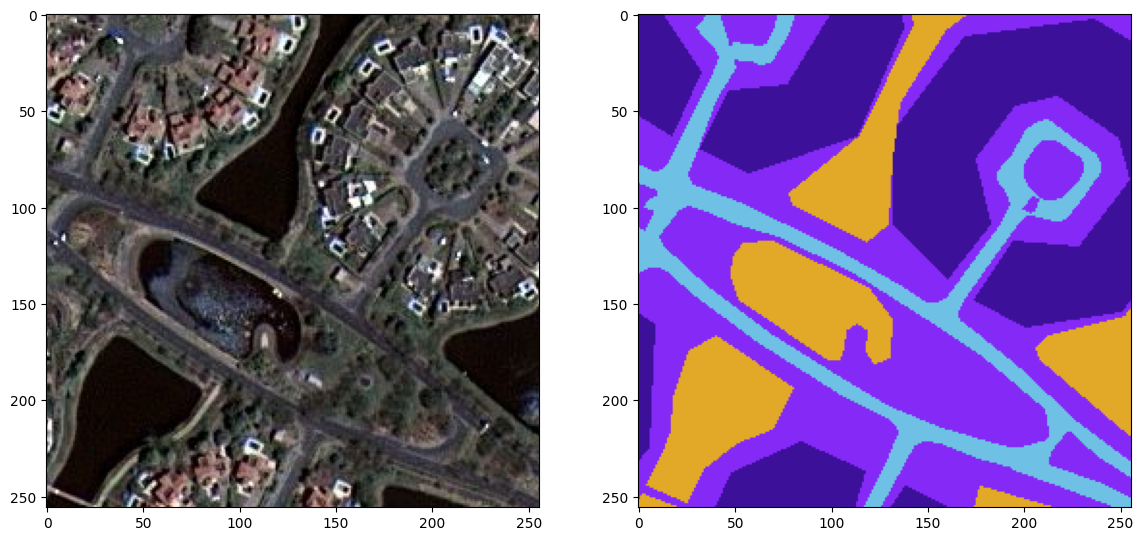

In [26]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [27]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [28]:
mask_dataset.shape[0]

945

In [29]:
label = individual_patched_mask

In [30]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  label_segment = label_segment[:,:,0]
  return label_segment

In [31]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [32]:
print(len(labels))

945


In [33]:
labels = np.array(labels)

In [34]:
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [35]:
labels = np.expand_dims(labels, axis=3)

In [36]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [37]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


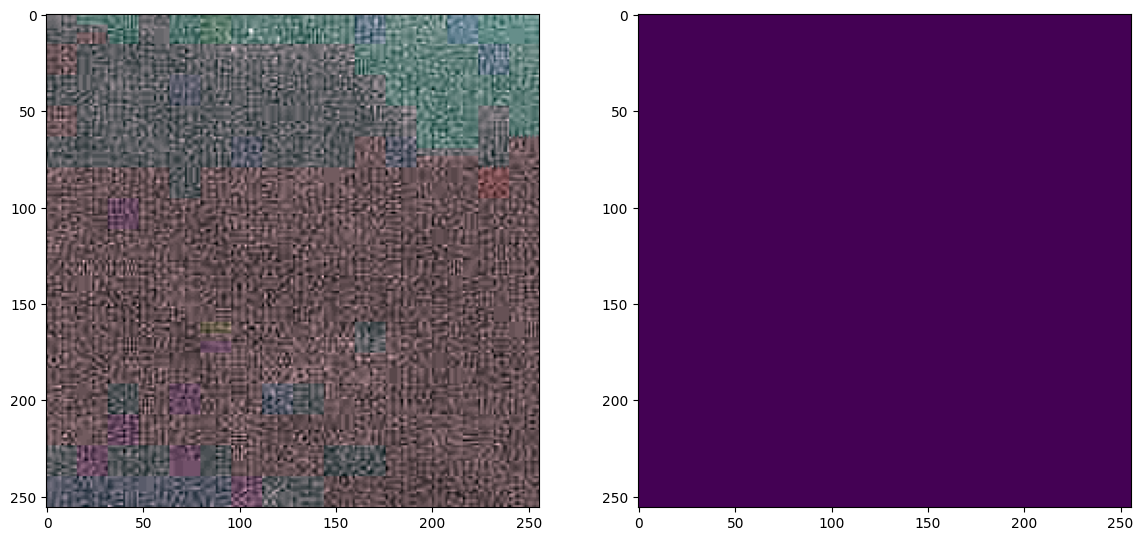

In [38]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(labels[random_image_id][:,:,0])

In [39]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [40]:
total_classes = len(np.unique(labels))

In [41]:
total_classes

6

In [42]:
pip install tensorflow --user


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/jupyter-228w1a4237/.local/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [44]:
%%capture
from tensorflow.keras.utils import to_categorical

2025-04-09 15:51:28.817066: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-09 15:51:28.827880: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744213888.839211   88510 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744213888.842424   88510 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744213888.850881   88510 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [45]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [46]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [47]:
master_trianing_dataset = image_dataset

In [48]:

from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [51]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [52]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [53]:
pip install -U segmentation-models

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [54]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [55]:
from keras import backend as K

In [84]:
import tensorflow as tf
from tensorflow.keras import backend as K

def jaccard_coef(y_true, y_pred):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_true_flatten * y_pred_flatten)
    final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
    return final_coef_value


In [85]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

    inputs = Input((image_height, image_width, image_channels))
    source_input = inputs

    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)

    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    c10 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)
    c11 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c10)

    outputs = Conv2D(n_classes, (1,1), activation="softmax")(c11)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [86]:
metrics = ["accuracy", jaccard_coef]

In [87]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [88]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [89]:
model = get_deep_learning_model()

In [90]:
model.get_config()

{'name': 'functional',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_layer'},
   'registered_name': None,
   'name': 'input_layer',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.ini

## Generating Loss Function

- dice loss > Focal Loss > Total Loss
- Total Loss = (Dice loss + (1*Focal Loss))

In [91]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [92]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [93]:
import segmentation_models as sm

In [94]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [95]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [96]:
total_loss = dice_loss + (1 * focal_loss)

## Model compilation

In [97]:
import tensorflow as tf

In [98]:
tf.keras.backend.clear_session()


In [99]:
# model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [100]:
#model.summary()

In [101]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',jaccard_coef])

In [102]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(803, 256, 256, 3) (803, 256, 256, 6)
(142, 256, 256, 3) (142, 256, 256, 6)


In [103]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=1000,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 463ms/step - accuracy: 0.5039 - jaccard_coef: 0.2534 - loss: 1.3438 - val_accuracy: 0.6510 - val_jaccard_coef: 0.3612 - val_loss: 1.0306
Epoch 2/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 449ms/step - accuracy: 0.6871 - jaccard_coef: 0.3799 - loss: 0.9648 - val_accuracy: 0.6992 - val_jaccard_coef: 0.4572 - val_loss: 0.8236
Epoch 3/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 449ms/step - accuracy: 0.7237 - jaccard_coef: 0.4538 - loss: 0.8052 - val_accuracy: 0.6838 - val_jaccard_coef: 0.4602 - val_loss: 0.9164
Epoch 4/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 450ms/step - accuracy: 0.7386 - jaccard_coef: 0.4774 - loss: 0.7542 - val_accuracy: 0.6853 - val_jaccard_coef: 0.4739 - val_loss: 0.9386
Epoch 5/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 449ms/step - accuracy: 0.7464 - jaccard_coef: 0.4989 - loss: 0.7139 - val_accuracy: 0.7139 - val_jaccard_coef: 0.4893 - val_loss: 0.8245
Epoch 6/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 451ms/step - accuracy: 0.7570 - jaccard_coef: 0.510

In [104]:
history_a = model_history

In [105]:
history_a.history

{'accuracy': [0.57265704870224,
  0.6838218569755554,
  0.722608208656311,
  0.741712212562561,
  0.7486420273780823,
  0.7593739628791809,
  0.7689186334609985,
  0.7748689651489258,
  0.7834019660949707,
  0.7883179187774658,
  0.8004467487335205,
  0.8024159073829651,
  0.8159112334251404,
  0.8147040009498596,
  0.8250904083251953,
  0.8278153538703918,
  0.8321373462677002,
  0.8365287780761719,
  0.8353508710861206,
  0.827057957649231,
  0.8401092290878296,
  0.845159113407135,
  0.8475461602210999,
  0.8492693305015564,
  0.850031852722168,
  0.8528227210044861,
  0.8522213697433472,
  0.8437535166740417,
  0.8564097285270691,
  0.8607735633850098,
  0.8612154126167297,
  0.8591244220733643,
  0.860925555229187,
  0.8652004599571228,
  0.8647283315658569,
  0.8684927225112915,
  0.8695785999298096,
  0.8687487840652466,
  0.8714998364448547,
  0.8753542304039001,
  0.8815613985061646,
  0.8821012377738953,
  0.8850240707397461,
  0.8861705660820007,
  0.8875840902328491,
  0.88

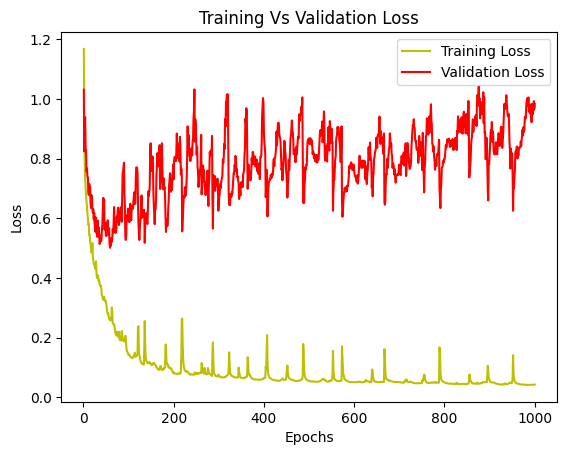

In [106]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

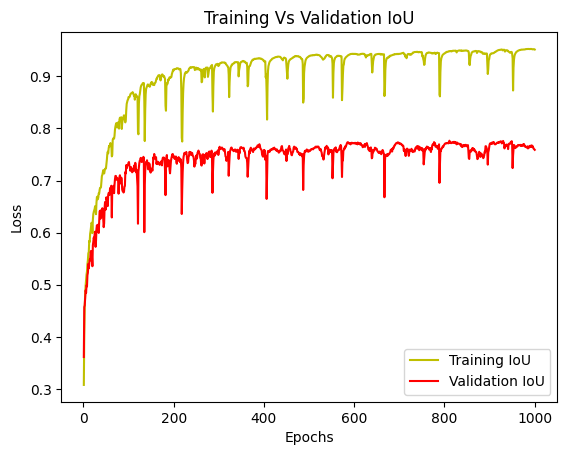

In [107]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [108]:
model_history.params

{'verbose': 1, 'epochs': 1000, 'steps': 51}

In [109]:
y_pred = model.predict(X_test)

/home/jupyter-228w1a4237/.local/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 256, 256, 3))
  warnings.warn(msg)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step


In [110]:
len(y_pred)
y_pred

array([[[[7.59727927e-03, 3.45935881e-01, 1.14132024e-01,
          5.00379801e-01, 3.16314772e-02, 3.23502813e-04],
         [5.75516606e-03, 3.95368844e-01, 8.65719393e-02,
          5.02859473e-01, 9.00841132e-03, 4.36207163e-04],
         [2.51693581e-03, 3.67893428e-01, 1.92567945e-01,
          4.27281260e-01, 9.32120625e-03, 4.19206510e-04],
         ...,
         [2.68374162e-04, 7.68450439e-01, 1.21857394e-02,
          2.12474018e-01, 6.55292580e-03, 6.84117622e-05],
         [5.23543102e-04, 7.35648632e-01, 1.39169423e-02,
          2.37311020e-01, 1.24416435e-02, 1.58192604e-04],
         [1.40920957e-03, 7.68641472e-01, 1.33462576e-02,
          2.08338231e-01, 7.87935965e-03, 3.85465770e-04]],

        [[1.34965579e-03, 3.83050501e-01, 1.28606781e-01,
          4.73157853e-01, 1.31682772e-02, 6.66970038e-04],
         [2.02897377e-03, 3.75660360e-01, 1.54262632e-01,
          4.62132901e-01, 3.70549224e-03, 2.20964546e-03],
         [5.22869581e-04, 3.26731265e-01, 2.4504

In [111]:
y_pred_argmax = np.argmax(y_pred, axis=3)
len(y_pred_argmax)

142

In [112]:
y_pred_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 1, ..., 2, 2, 2],
        [1, 2, 1, ..., 2, 2, 2],
        [1, 1, 2, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 

In [113]:
y_test_argmax = np.argmax(y_test, axis=3)
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Comparing prediction results


In [114]:
import random
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


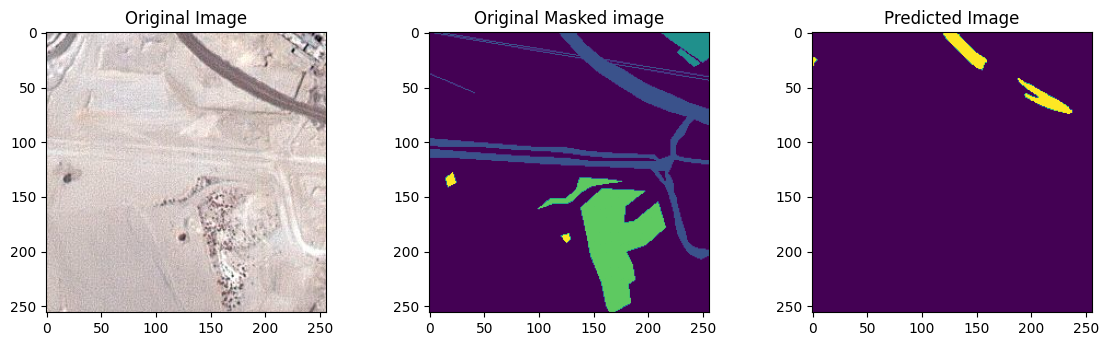

In [115]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


In [116]:
model.save('Model/nice1.h5')

# Visualize Model with Keras

In [117]:
from keras.utils import plot_model

In [118]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [119]:
plot_model(model, to_file="satellite_model_plot.png", show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [120]:
import keras
from IPython.display import clear_output

%matplotlib inline

In [121]:
class PlotLoss(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)


    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    clear_output(wait=True)


    plt.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    plt.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")

    plt.legend()
    plt.show();

plot_loss = PlotLoss()

In [122]:
class PlotLossEx(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []

    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)

    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    plt.figure(figsize=(14,8))
    f, (graph1, graph2) = plt.subplots(1,2, sharex=True)

    clear_output(wait=True)

    graph1.set_yscale('log')
    graph1.plot(self.x, self.losses, label="loss")
    graph1.plot(self.x, self.val_losses, label="val_loss")
    graph1.legend()

    graph2.set_yscale('log')
    graph2.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    graph2.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")
    graph2.legend()

    plt.show();

plot_loss = PlotLossEx()

<Figure size 1400x800 with 0 Axes>

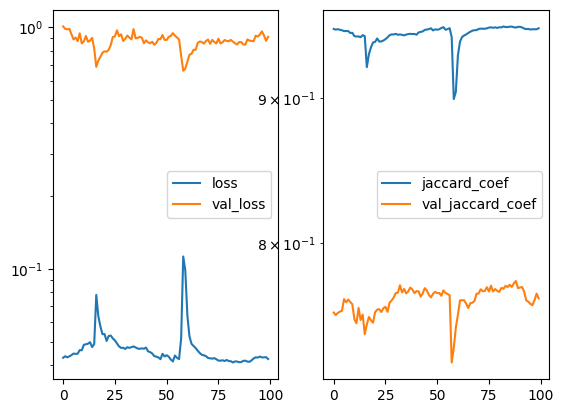

51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 440ms/step - accuracy: 0.9830 - jaccard_coef: 0.9526 - loss: 0.0418 - val_accuracy: 0.8704 - val_jaccard_coef: 0.7650 - val_loss: 0.9127


In [123]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          callbacks=[plot_loss],
                          shuffle=False)

In [124]:
history_a = model_history

In [125]:
history_a.history

{'accuracy': [0.9825557470321655,
  0.9823445677757263,
  0.9824808835983276,
  0.9823080897331238,
  0.9821709990501404,
  0.981920063495636,
  0.9819570183753967,
  0.9819165468215942,
  0.981469988822937,
  0.9813782572746277,
  0.9805715084075928,
  0.9805374145507812,
  0.9804143309593201,
  0.980225682258606,
  0.9809616804122925,
  0.9805780649185181,
  0.9723612666130066,
  0.9757733941078186,
  0.977588951587677,
  0.9790182113647461,
  0.9789910316467285,
  0.9798348546028137,
  0.9790087938308716,
  0.9790560603141785,
  0.9792759418487549,
  0.9796310067176819,
  0.9802232980728149,
  0.9807795286178589,
  0.9810155630111694,
  0.9810032248497009,
  0.9812108874320984,
  0.9809525609016418,
  0.9810705780982971,
  0.980951189994812,
  0.9807705879211426,
  0.9810576438903809,
  0.9812009930610657,
  0.9811812043190002,
  0.9811120629310608,
  0.9811851978302002,
  0.9809449315071106,
  0.9816280603408813,
  0.9816914200782776,
  0.9819439053535461,
  0.9823198914527893,
  0

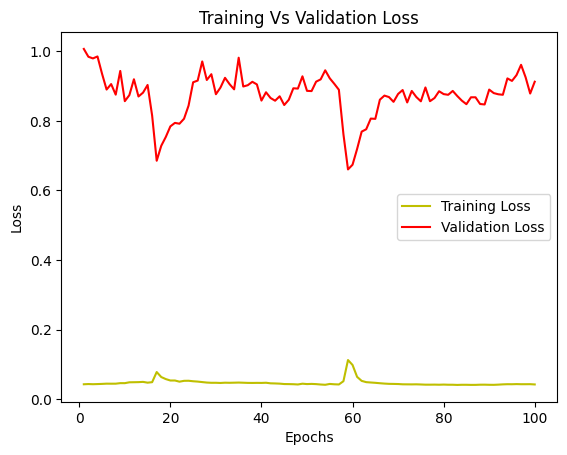

In [126]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

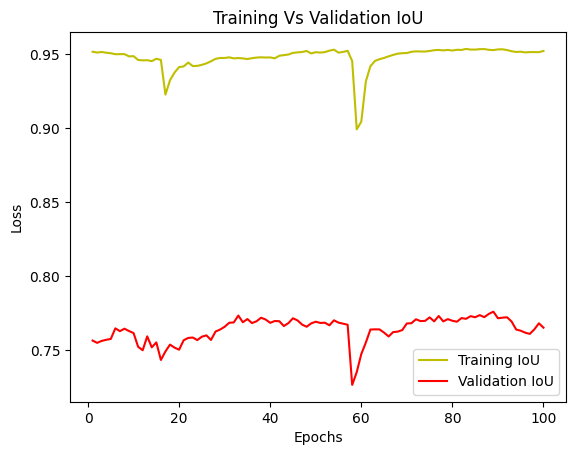

In [127]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [128]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 51}

In [129]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step


In [130]:
len(y_pred)

142

In [131]:
y_pred

array([[[[1.97513611e-03, 7.69825652e-02, 4.13034018e-03,
          9.04154480e-01, 1.27421301e-02, 1.53085894e-05],
         [7.57304661e-04, 1.71181962e-01, 2.03907164e-03,
          8.22082162e-01, 3.92882572e-03, 1.06018015e-05],
         [6.10863906e-04, 1.47248313e-01, 7.69702531e-03,
          8.41155112e-01, 3.23897763e-03, 4.97128931e-05],
         ...,
         [3.14767822e-03, 3.77260059e-01, 1.86935794e-02,
          5.94831035e-02, 5.41108906e-01, 3.06623930e-04],
         [5.38454764e-03, 3.90451759e-01, 2.35733148e-02,
          8.59005377e-02, 4.94220376e-01, 4.69453749e-04],
         [2.73114885e-03, 2.24285930e-01, 1.65859368e-02,
          1.31756306e-01, 6.21176779e-01, 3.46390530e-03]],

        [[2.45267549e-03, 1.30820841e-01, 2.06775032e-03,
          8.61334324e-01, 3.10441176e-03, 2.19988215e-04],
         [2.15792286e-04, 1.10649243e-01, 8.75285827e-04,
          8.87133062e-01, 8.95302044e-04, 2.31267259e-04],
         [2.56683707e-04, 9.94651690e-02, 1.5640

In [132]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [133]:
len(y_pred_argmax)

142

In [134]:
y_pred_argmax

array([[[3, 3, 3, ..., 4, 4, 4],
        [3, 3, 3, ..., 4, 4, 4],
        [3, 3, 3, ..., 4, 4, 4],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 1, ..., 2, 2, 4],
        [1, 2, 1, ..., 2, 2, 4],
        [1, 2, 2, ..., 2, 2, 4]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [135]:
y_test_argmax = np.argmax(y_test, axis=3)

In [136]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Comparing prediction results
-  using test images using mask images and predicted result images..

In [137]:
import random
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


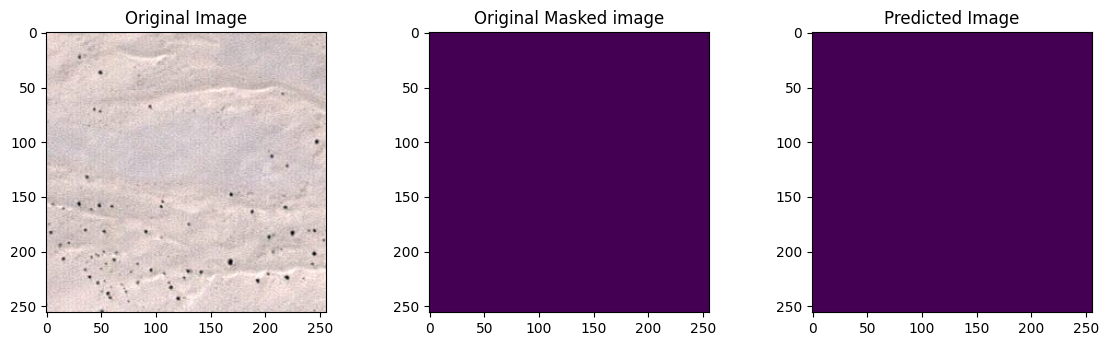

In [138]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


Gradio

In [139]:
pip install gradio==3.24.0

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 14.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 k

In [140]:
pip install -U segmentation-models

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [141]:
import os
import cv2
from PIL import Image
import numpy as np
%env SM_FRAMEWORK=tf.keras
import segmentation_models as sm
from matplotlib import pyplot as plt
import random

import gradio as gr



from keras import backend as K
from keras.models import load_model

env: SM_FRAMEWORK=tf.keras


In [142]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [143]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights = weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

In [154]:
satellite_model = load_model('Model/nice1.h5',
                         custom_objects=({'dice_loss_plus_1focal_loss': total_loss,
                                          'jaccard_coef': jaccard_coef}))

In [155]:
image = Image.open('Image/image_part_005.jpg')
image = image.resize((256,256))
image = np.array(image)
image = np.expand_dims(image, 0)

In [156]:
prediction = satellite_model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


In [157]:
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

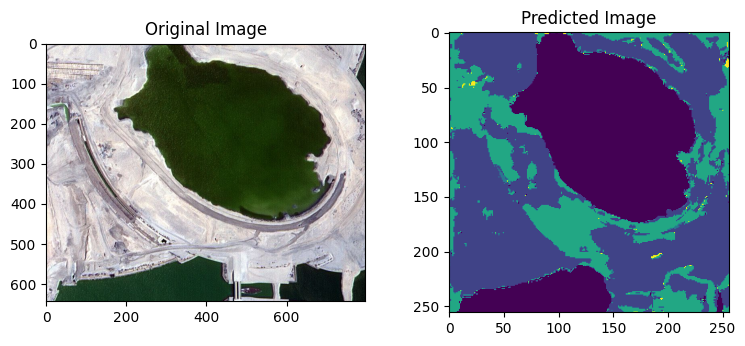

In [158]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('Image/image_part_005.jpg'))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [149]:
def process_input_image(image_source):
  image = np.expand_dims(image_source, 0)

  prediction = satellite_model.predict(image)
  predicted_image = np.argmax(prediction, axis=3)

  predicted_image = predicted_image[0,:,:]
  predicted_image = predicted_image * 50
  return 'Predicted Masked Image', predicted_image

In [ ]:
# my_app = gr.Blocks()

In [162]:
import gradio as gr

with gr.Blocks() as my_app:
    gr.Markdown("Satellite Image Segmentation Application UI with Gradio")
    with gr.Tabs():
        with gr.TabItem("Select your image"):
            with gr.Row():
                with gr.Column():
                    img_source = gr.Image(label="Please select source Image", shape=(256, 256))
                    source_image_loader = gr.Button("Load above Image")
                with gr.Column():
                    output_label = gr.Label(label="Image Info")
                    img_output = gr.Image(label="Image Output")
            source_image_loader.click(
                process_input_image,
                inputs=[img_source],
                outputs=[output_label, img_output]
            )


In [166]:
my_app.launch(server_name="0.0.0.0", server_port=7861)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [167]:
my_app.close()

Closing server running on port: 7861
